In [32]:
# importing the required libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
import random

In [33]:
os.getcwd()

'C:\\Users\\Jaya Chandra\\Downloads\\Financial Distress'

In [34]:
# Reading the dataset
data = pd.read_csv("C:\\Users\\Jaya Chandra\\Downloads\\Financial Distress\\Financial_Distress_data.csv")



In [35]:
# Checking the dataset
data.head()
data.tail()
data.describe()

,Company,Time,Financial Distress,x1,x2,x3,x4,x5,x6,x7,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83
count,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3.672000e+03,3672.000000,3672.000000,3672.000000,...,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000
mean,182.084423,7.528322,1.040257,1.387820,0.129706,0.615769,8.681599e-01,0.154949,0.106717,0.784031,...,86.839822,91.920506,89.115908,17.780855,15.198708,-2.664305,19.714597,1.100488,13.122277,33.044935
std,117.024636,4.064016,2.652227,1.452926,0.120013,0.177904,5.719519e-01,0.124904,0.210555,1.033606,...,16.706209,64.656504,64.349382,2.040152,2.828648,8.192663,7.508588,2.666733,9.465907,13.714563
min,1.000000,1.000000,-8.631700,0.075170,-0.258080,0.016135,5.350000e-07,-0.269790,-0.627750,0.035160,...,54.806000,24.318000,23.776000,15.250000,12.000000,-20.200000,1.000000,-0.499220,1.000000,2.000000
25%,80.000000,4.000000,0.172275,0.952145,0.048701,0.501888,5.525575e-01,0.070001,-0.027754,0.436003,...,79.951000,39.800000,38.377000,16.000000,13.000000,-7.000000,14.000000,0.189912,6.000000,21.000000
50%,168.000000,7.000000,0.583805,1.183600,0.107530,0.638690,7.752450e-01,0.131830,0.104325,0.641875,...,90.000000,66.120000,59.471000,17.000000,14.500000,0.200000,20.000000,0.594765,11.000000,34.000000
75%,264.250000,11.000000,1.351750,1.506475,0.188685,0.749425,1.039000e+00,0.219570,0.231230,0.896773,...,93.883000,130.500000,132.400000,20.000000,16.000000,2.100000,26.000000,1.355050,17.000000,44.000000
max,422.000000,14.000000,128.400000,51.954000,0.749410,0.967900,6.835600e+00,0.858540,0.929550,38.836000,...,120.870000,227.500000,214.500000,22.000000,22.000000,8.600000,37.000000,128.400000,49.000000,74.000000


In [36]:
# How many companies are there?
print("Number of companies:",data.Company.unique().shape)

Number of companies: (422,)


In [37]:
# dropping the categorical variable for time being
data = data[data.columns.drop(list(data.filter(regex='x80')))]
#data = data[data.columns.drop(list(data.filter(regex='x80')))]

In [38]:
data.head(3)

,Company,Time,Financial Distress,x1,x2,x3,x4,x5,x6,x7,...,x73,x74,x75,x76,x77,x78,x79,x81,x82,x83
0,1,1,0.010636,1.2810,0.022934,0.87454,1.21640,0.060940,0.188270,0.52510,...,36.0,85.437,27.07,26.102,16.0,16.0,0.2,0.060390,30,49
1,1,2,-0.455970,1.2700,0.006454,0.82067,1.00490,-0.014080,0.181040,0.62288,...,36.0,107.090,31.31,30.194,17.0,16.0,0.4,0.010636,31,50
2,1,3,-0.325390,1.0529,-0.059379,0.92242,0.72926,0.020476,0.044865,0.43292,...,35.0,120.870,36.07,35.273,17.0,15.0,-0.2,-0.455970,32,51


In [39]:
# Creating target vector and feature matrix
Y = data.iloc[:,2].values

print(Y)

[ 0.010636 -0.45597  -0.32539  ...  0.50077   0.61103   0.51865 ]


In [40]:
# converting target variable from continuous form to binary form
#We convert the continuous response variable "Financial distress" to a categorical variable, where '1' represents that
#the company is bankrupt, whereas '0' suggests a healthy company.Also, we do not consider the columns "Time" and "Company" 
#for our analysis."X" is the feature matrix; "Y" is the target vector.

for y in range(0,len(Y)):
    if Y[y] > -0.5:
        Y[y] = 0
    else:
        Y[y] = 1

In [41]:
data['Financial Distress'].head(4)

0    0.0
1    0.0
2    0.0
3    1.0
Name: Financial Distress, dtype: float64

In [42]:
#Feature Matrix
X = data.iloc[:,3:].values

In [43]:
X

array([[ 1.2810e+00,  2.2934e-02,  8.7454e-01, ...,  6.0390e-02,
         3.0000e+01,  4.9000e+01],
       [ 1.2700e+00,  6.4542e-03,  8.2067e-01, ...,  1.0636e-02,
         3.1000e+01,  5.0000e+01],
       [ 1.0529e+00, -5.9379e-02,  9.2242e-01, ..., -4.5597e-01,
         3.2000e+01,  5.1000e+01],
       ...,
       [ 1.7099e+00,  2.0797e-01,  2.6136e-01, ...,  4.8241e-01,
         6.0000e+00,  4.3000e+01],
       [ 1.5590e+00,  1.8545e-01,  3.0728e-01, ...,  5.0077e-01,
         7.0000e+00,  4.4000e+01],
       [ 1.6148e+00,  1.7676e-01,  3.6369e-01, ...,  6.1103e-01,
         8.0000e+00,  4.5000e+01]])

In [44]:
# How many Bankrupt companies and Healthy companies are there????

num_zeros = 0

for num in Y:
    if num == 0:
        num_zeros = num_zeros + 1
        
        
num_ones = len(Y) -num_zeros

print("Number of Bankrupt companies(1's):",num_ones)
print("Number of Healthy companies(0's):",num_zeros)


Number of Bankrupt companies(1's): 136
Number of Healthy companies(0's): 3536


The data is highly skewed 

In [45]:
# Splitting the data into training and testing set, before oversampling in order to prevent the information leak.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size = 0.30, random_state = 0)
X_train_wo_sampling = X_train
y_train_wo_sampling = y_train


In [46]:
# Creating more samples units for the bankrupt companies(undersampled data)

In [47]:
y_train = (np.matrix(y_train)).T
y_train = pd.DataFrame(y_train)
y_train.columns = ["Financial_Distress"]
X_train = pd.DataFrame(X_train)
frame = [X_train,y_train]
train_data = pd.concat(frame,axis = 1)
bankrupt_companies = train_data[train_data.Financial_Distress == 1]


In [48]:
print(bankrupt_companies)

            0         1        2        3         4         5        6  \
24    0.72601 -0.133740  0.79452  0.22155 -0.024119 -0.194890  0.60304   
86    1.07050  0.006286  0.79027  0.31985 -0.002291  0.021392  0.34992   
89    1.37990 -0.104210  0.60369  0.25075 -0.084244  0.213070  0.55143   
169   1.03350 -0.073828  0.86506  0.31855 -0.067301  0.027883  0.15051   
196   1.27400  0.029515  0.64634  1.12250  0.095558  0.175130  0.75978   
...       ...       ...      ...      ...       ...       ...      ...   
2495  1.07480 -0.053024  0.73580  1.10270 -0.027148  0.051980  0.49208   
2496  1.05280  0.049842  0.87622  1.38230  0.195930  0.035480  0.45507   
2503  1.22640  0.020944  0.82133  1.03900 -0.001431  0.173640  0.78507   
2548  1.34650  0.034011  0.76530  3.23050  0.036783  0.213700  0.33127   
2559  0.57287 -0.047373  0.88606  0.46219  0.021694 -0.334060  0.27040   

             7         8         9  ...      73       74       75      76  \
24   -0.603660 -0.650880 -0.138620

In [49]:
feat_mat = bankrupt_companies.iloc[:,:-1].values
#print(feat_mat)
response = bankrupt_companies.iloc[:,-1].values
#print(response)

col_mean = np.zeros(shape=(82,1)) 
#print(col_mean)
col_std = np.zeros(shape=(82,1))
#print(col_std)
Dim_1 = np.shape(feat_mat)
#print(Dim_1)




In [50]:
# Logic to calculate mean and standard deviation for each column
for i in range(0,Dim_1[1]): 
       col_mean[i,0] = np.mean(feat_mat[:,i])
       col_std[i,0] = np.std(feat_mat[:,i])
col_mean_and_std = np.hstack((col_mean,col_std))



In [51]:
print(col_mean_and_std)

[[ 1.06949600e+00  3.57245713e-01]
 [-1.33572440e-02  6.77190689e-02]
 [ 7.89428842e-01  1.13375899e-01]
 [ 7.10756637e-01  4.84970861e-01]
 [ 1.22348433e-02  6.93007422e-02]
 [ 2.79420526e-02  1.84870265e-01]
 [ 5.46767684e-01  2.57939699e-01]
 [ 2.19992097e+03  2.13297995e+04]
 [-9.43342137e-02  5.19588722e-01]
 [-3.18640682e-02  8.01521390e-02]
 [ 7.00971116e-01  1.96106189e-01]
 [-4.68915519e+02  4.30721227e+03]
 [ 2.10570674e-01  1.13375780e-01]
 [ 5.37192400e+00  4.12168170e+00]
 [ 3.51427557e+01  2.94332279e+02]
 [-2.52480588e+02  2.44771934e+03]
 [ 2.08779023e+03  2.02068045e+04]
 [ 2.88788485e-02  2.92017056e-02]
 [ 1.46327133e+03  1.41858304e+04]
 [ 4.62484211e-02  5.49022587e-02]
 [ 1.02822438e+00  6.35629849e-01]
 [ 5.82031485e+00  5.99712702e+00]
 [ 1.22514654e-01  1.23857735e-01]
 [ 6.73029789e-01  1.52897790e-01]
 [ 2.17129495e+01  6.73921139e+02]
 [ 1.27216547e+01  1.40163942e+00]
 [ 6.31030661e+00  3.90095259e+01]
 [ 1.03350662e-01  2.02389418e-01]
 [ 1.16400293e-01  1

In [52]:
added_data = np.zeros(shape=(1200,Dim_1[1])) 
print(added_data)

for i in range (0,len(col_mean_and_std)):
       mean_ = col_mean_and_std[i,0]
       std_ = col_mean_and_std[i,1]
       added_data[:,i] = np.random.normal(mean_,std_,1200)
added_y = np.ones(shape=(1200,1)) # Creating labels for the added data
print(added_y)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]


In [53]:

X_resampled = np.vstack((X_train,added_data)) # Combining the original data + added data


In [54]:
print(X_resampled)

[[ 9.65510000e-01  5.38380000e-04  9.25900000e-01 ... -2.23230000e-01
   1.10000000e+01  2.10000000e+01]
 [ 1.30520000e+00  1.59120000e-01  5.79630000e-01 ...  1.14970000e-01
   8.00000000e+00  2.10000000e+01]
 [ 9.81820000e-01 -2.55280000e-02  7.28130000e-01 ... -3.93400000e-02
   3.40000000e+01  5.20000000e+01]
 ...
 [ 6.31705359e-01 -3.83961462e-02  6.88671544e-01 ... -1.14069298e+00
   1.39247855e+01  3.27181868e+01]
 [ 1.41663460e+00  5.80929591e-03  8.64834101e-01 ... -7.66632680e-01
   1.32471694e+01  4.78597935e+01]
 [ 1.31404251e+00 -8.55284435e-03  7.28086311e-01 ... -8.80169343e-01
   9.18503708e+00  2.60528911e+01]]


In [60]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.]])

In [61]:
y_train = np.array(y_train).T


In [62]:
y_train

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [63]:
added_y

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [64]:
y_resampled = np.vstack((y_train,added_y))

In [65]:
#print(y_resampled)
print(X_resampled)

[[ 9.65510000e-01  5.38380000e-04  9.25900000e-01 ... -2.23230000e-01
   1.10000000e+01  2.10000000e+01]
 [ 1.30520000e+00  1.59120000e-01  5.79630000e-01 ...  1.14970000e-01
   8.00000000e+00  2.10000000e+01]
 [ 9.81820000e-01 -2.55280000e-02  7.28130000e-01 ... -3.93400000e-02
   3.40000000e+01  5.20000000e+01]
 ...
 [ 6.31705359e-01 -3.83961462e-02  6.88671544e-01 ... -1.14069298e+00
   1.39247855e+01  3.27181868e+01]
 [ 1.41663460e+00  5.80929591e-03  8.64834101e-01 ... -7.66632680e-01
   1.32471694e+01  4.78597935e+01]
 [ 1.31404251e+00 -8.55284435e-03  7.28086311e-01 ... -8.80169343e-01
   9.18503708e+00  2.60528911e+01]]


In [66]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_resampled = sc.fit_transform(X_resampled)
X_test = sc.transform(X_test)

Feature Scaling : Feature Scaling is a technique to standardize the independent features present in the data in a fixed range. It is performed during the data pre-processing to handle highly varying magnitudes or values or units. If feature scaling is not done, then a machine learning algorithm tends to weigh greater values, higher and consider smaller values as the lower values, regardless of the unit of the values

In [67]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_resampled = sc.fit_transform(X_resampled)

X_test = sc.transform(X_test)

In [68]:
print(X_resampled)

[[-0.23718002 -0.6786098   1.42583695 ... -0.62990397 -0.26437471
  -0.94456914]
 [ 0.00713081  0.59122014 -0.51839844 ... -0.40329845 -0.57780283
  -0.94456914]
 [-0.22544959 -0.8873343   0.31539876 ... -0.50669141  2.13857419
   1.38200864]
 ...
 [-0.477258   -0.99037497  0.09384758 ... -1.24463542  0.04119529
  -0.06510872]
 [ 0.08727646 -0.63640335  1.08296438 ... -0.99400228 -0.02959936
   1.07128243]
 [ 0.01349049 -0.75140707  0.31515345 ... -1.07007571 -0.45399485
  -0.56534514]]


In [69]:
#y = column_or_1d(y, warn=True)

For model comparison, I have selected 7 Models for this analaysis, and they are as follows: Model 1 - XGBoostClassifier Model 2 - Support Vector Classifier(SCV) Model 3 - RandomForestClassifier Model 4 - Logistic Model 5 - BalancedBaggingClassifier Model 6 - Decision Tree Model 7 - Naive Bayes Classifier

In [70]:
# Model 1 : Fitting XGBClassifier to the training data

from xgboost import XGBClassifier
classifier_1 = XGBClassifier()
classifier_1.fit(X_resampled,np.ravel(y_resampled))


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [71]:
# Model 2 : Fitting SVM to the training data 

from sklearn.svm import SVC
classifier_2 = SVC(kernel='linear', C=1, probability = True, random_state = random.seed(123))
classifier_2.fit(X_resampled, np.ravel(y_resampled))

SVC(C=1, kernel='linear', probability=True)

In [72]:
# Model 3: Creating and Fitting Random Forest Classifier to the training data 

from sklearn.ensemble import RandomForestClassifier
classifier_3 = RandomForestClassifier(n_estimators=5, criterion='entropy')
classifier_3.fit(X_resampled,np.ravel(y_resampled))

RandomForestClassifier(criterion='entropy', n_estimators=5)

In [78]:
# Model 4: Creating and Fitting logistic Regression to the training data

from sklearn.linear_model import LogisticRegression
classifier_4 = LogisticRegression(penalty = 'l1', solver='liblinear', random_state = 0)
classifier_4.fit(X_resampled,np.ravel(y_resampled))

LogisticRegression(penalty='l1', random_state=0, solver='liblinear')

In [74]:
# Model 5 : Fitting Balanced Bagging Classifier to the training data 

from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.ensemble import RandomForestClassifier#base_estimator

classifier_5 = BalancedBaggingClassifier(base_estimator = RandomForestClassifier(criterion='entropy'),n_estimators = 5,
                                         bootstrap = True)

classifier_5.fit(X_resampled,np.ravel(y_resampled))

BalancedBaggingClassifier(base_estimator=RandomForestClassifier(criterion='entropy'),
                          n_estimators=5)

In [81]:
# Model 6 : Fitting Decision Tree to the training data

from sklearn.tree import DecisionTreeClassifier
classifier_6 = DecisionTreeClassifier()
classifier_6.fit(X_resampled,np.ravel(y_resampled))

DecisionTreeClassifier()

In [82]:
# Model 7 : Fitting Naive Bayes to the training data 

from sklearn.naive_bayes import GaussianNB
classifier_7 = GaussianNB()
classifier_7.fit(X_resampled,np.ravel(y_resampled))

GaussianNB()

In [83]:
# Prediciting the results

y_pred_1 = classifier_1.predict(X_test)
y_pred_2 = classifier_2.predict(X_test)
y_pred_3 = classifier_3.predict(X_test)
y_pred_4 = classifier_4.predict(X_test)
y_pred_5 = classifier_5.predict(X_test)
y_pred_6 = classifier_6.predict(X_test)
y_pred_7 = classifier_7.predict(X_test)

In [87]:
#print(y_pred_7)

In [89]:
# Creating the confusion matrix

from sklearn.metrics import confusion_matrix
cm_1 = confusion_matrix(y_test,y_pred_1)
#print(cm_1)
accuracy_1 = (cm_1[0,0]+cm_1[1,1])/len(y_test)
#print(accuracy_1)

[[1045   16]
 [  31   10]]


In [91]:
cm_2 = confusion_matrix(y_test,y_pred_2)
#print(cm_2)
accuracy_2 = (cm_2[0,0]+cm_2[1,1])/len(y_test)
print(accuracy_2)

0.9074410163339383


In [92]:
cm_3 = confusion_matrix(y_test,y_pred_3)
#print(cm_3)
accuracy_3 = (cm_3[0,0]+cm_3[1,1])/len(y_test)
print(accuracy_3)

0.9582577132486388


In [93]:
cm_4 = confusion_matrix(y_test,y_pred_4)
#print(cm_4)
accuracy_4 = (cm_4[0,0]+cm_4[1,1])/len(y_test)
print(accuracy_4)

0.9128856624319419


In [94]:
cm_5 = confusion_matrix(y_test,y_pred_5)
#print(cm_5)
accuracy_5 = (cm_5[0,0]+cm_5[1,1])/len(y_test)
print(accuracy_5)

0.9600725952813067


In [95]:
cm_6 = confusion_matrix(y_test,y_pred_6)
#print(cm_6)
accuracy_6 = (cm_6[0,0]+cm_6[1,1])/len(y_test)
print(accuracy_6)

0.9437386569872959


In [96]:
cm_7 = confusion_matrix(y_test,y_pred_7)
#print(cm_7)
accuracy_7 = (cm_7[0,0]+cm_7[1,1])/len(y_test)
print(accuracy_7)

0.32123411978221417


In [103]:
# Calculating F-score and other performance metrics as the data is imbalanced.

from sklearn.metrics import precision_recall_fscore_support
precision_1, recall_1, f_score_1, support = precision_recall_fscore_support(y_test, y_pred_1, average=None)
print("Model-1 : XGBoost:")
print("Precision:",precision_1)
print("Recall:",recall_1)
print("F-Score:",f_score_1)
print("Accuracy_XGBoost:",round(accuracy_1*100,2),'%')


from sklearn.metrics import precision_recall_fscore_support
precision_2, recall_2, f_score_2, support = precision_recall_fscore_support(y_test, y_pred_2, average=None)
print("\n")
print("Model-2 : SVC:")
print("Precision:",precision_2)
print("Recall:",recall_2)
print("F-Score:",f_score_2)
print("Accuracy_XGBoost:",round(accuracy_2*100,2),'%')


from sklearn.metrics import precision_recall_fscore_support
precision_3, recall_3, f_score_3, support = precision_recall_fscore_support(y_test, y_pred_3, average=None)
print("\n")
print("Model-3 : Random Forest:")
print("Precision:",precision_3)
print("Recall:",recall_3)
print("F-Score:",f_score_3)
print("Accuracy_XGBoost:",round(accuracy_3*100,2),'%')

from sklearn.metrics import precision_recall_fscore_support
precision_4, recall_4, f_score_4, support = precision_recall_fscore_support(y_test, y_pred_4, average=None)
print("\n")
print("Model-4 : Logistic:")
print("Precision:",precision_4)
print("Recall:",recall_4)
print("F-Score:",f_score_4)
print("Accuracy_XGBoost:",round(accuracy_4*100,2),'%')

from sklearn.metrics import precision_recall_fscore_support
precision_5, recall_5, f_score_5, support = precision_recall_fscore_support(y_test, y_pred_5, average=None)
print("\n")
print("Model-5 : BalancedBaggingClassifier:")
print("Precision:",precision_5)
print("Recall:",recall_5)
print("F-Score:",f_score_5)
print("Accuracy_XGBoost:",round(accuracy_5*100,2),'%')

from sklearn.metrics import precision_recall_fscore_support
precision_6, recall_6, f_score_6, support = precision_recall_fscore_support(y_test, y_pred_6, average=None)
print("\n")
print("Model-6 : DecisionTreeClassifier:")
print("Precision:",precision_6)
print("Recall:",recall_6)
print("F-Score:",f_score_6)
print("Accuracy_XGBoost:",round(accuracy_6*100,2),'%')

from sklearn.metrics import precision_recall_fscore_support
precision_7, recall_7, f_score_7, support = precision_recall_fscore_support(y_test, y_pred_7, average=None)
print("\n")
print("Model-7 : Naive Bayes Classifier:")
print("Precision:",precision_7)
print("Recall:",recall_7)
print("F-Score:",f_score_7)
print("Accuracy_XGBoost:",round(accuracy_7*100,2),'%')



Model-1 : XGBoost:
Precision: [0.97118959 0.38461538]
Recall: [0.98491989 0.24390244]
F-Score: [0.97800655 0.29850746]
Accuracy_XGBoost: 95.74 %


Model-2 : SVC:
Precision: [0.99179487 0.25984252]
Recall: [0.91140434 0.80487805]
F-Score: [0.94990177 0.39285714]
Accuracy_XGBoost: 90.74 %


Model-3 : Random Forest:
Precision: [0.97034291 0.39130435]
Recall: [0.9868049 0.2195122]
F-Score: [0.97850467 0.28125   ]
Accuracy_XGBoost: 95.83 %


Model-4 : Logistic:
Precision: [0.99284985 0.27642276]
Recall: [0.91611687 0.82926829]
F-Score: [0.95294118 0.41463415]
Accuracy_XGBoost: 91.29 %


Model-5 : BalancedBaggingClassifier:
Precision: [0.97836312 0.46153846]
Recall: [0.98020735 0.43902439]
F-Score: [0.97928437 0.45      ]
Accuracy_XGBoost: 96.01 %


Model-6 : DecisionTreeClassifier:
Precision: [0.97526166 0.29411765]
Recall: [0.96606975 0.36585366]
F-Score: [0.97064394 0.32608696]
Accuracy_XGBoost: 94.37 %


Model-7 : Naive Bayes Classifier:
Precision: [0.99059561 0.04853129]
Recall: [0.2978

Text(0, 0.5, 'Accuracy')

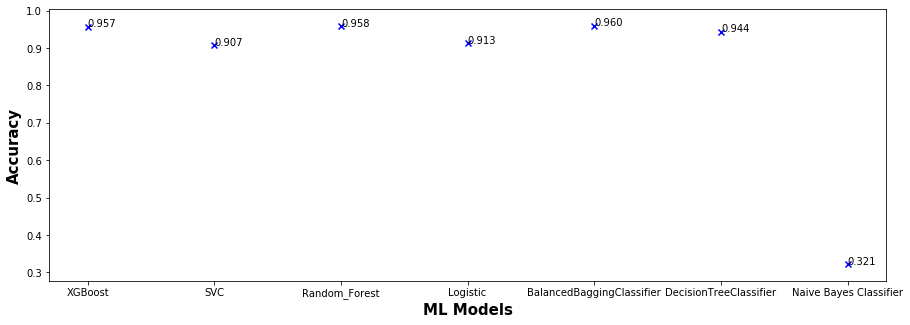

In [125]:
# Comparing the Accuracies of various models
ACCURACY = np.vstack((accuracy_1,accuracy_2,accuracy_3,accuracy_4,accuracy_5,accuracy_6,accuracy_7))
number = np.array(["XGBoost","SVC","Random_Forest","Logistic","BalancedBaggingClassifier",
                   "DecisionTreeClassifier","Naive Bayes Classifier"])
fig = plt.figure(figsize=(15,5))
#plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.scatter(number, ACCURACY, color = 'blue', marker = 'x', linewidths = 3)
for i in range(0,len(ACCURACY)):
       ax.annotate('%0.3f' % (ACCURACY[i]),(number[i], ACCURACY[i]))

plt.xlabel('ML Models',fontweight='bold',fontsize=15)    
plt.ylabel('Accuracy',fontweight='bold',fontsize=15)

In [113]:
print(f_score_1)

[0.97800655 0.29850746]


Text(0, 0.5, 'F-score')

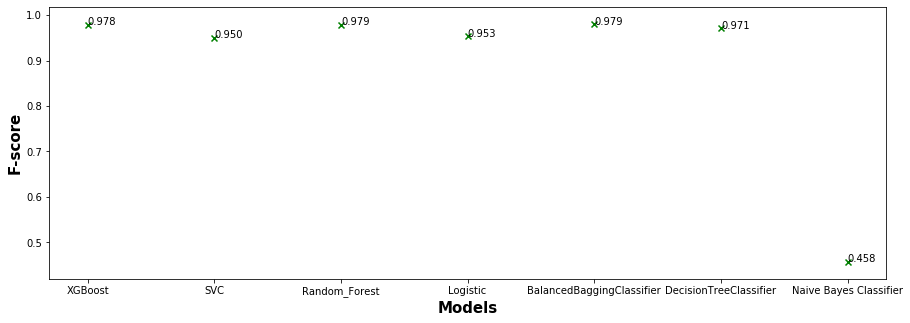

In [132]:
# Comparing the F-Values of various models
f_score = np.vstack((f_score_1[0],f_score_2[0],f_score_3[0],f_score_4[0],f_score_5[0],f_score_6[0],f_score_7[0]))
number = np.array(["XGBoost","SVC","Random_Forest","Logistic","BalancedBaggingClassifier",
                   "DecisionTreeClassifier","Naive Bayes Classifier"])
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax.scatter(number, f_score,color='Green', marker = 'x', linewidths = 3)
for i in range(0,len(f_score)):
       ax.annotate('%0.3f' % (f_score[i]),(number[i], f_score[i]))

plt.xlabel('Models',fontweight='bold',fontsize=15)    
plt.ylabel('F-score',fontweight='bold',fontsize=15)


Evaluating the performance of the model further by computing ROC and AUC curve

In [ ]:
from sklearn.metrics import roc_curve, auc
from scipy import interp

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
i = 0

probas_1 = classifier_1.predict_proba(X_test)
probas_2 = classifier_2.predict_proba(X_test)
probas_3 = classifier_3.predict_proba(X_test)
probas_4 = classifier_4.predict_proba(X_test)
probas_5 = classifier_5.predict_proba(X_test)
probas_6 = classifier_6.predict_proba(X_test)
probas_7 = classifier_7.predict_proba(X_test)

probas = np.vstack((probas_1,probas_2,probas_3,probas_4,probas_5,probas_6,probas_7))

# Compute ROC curve and area the curve
pointer = [0,1102,2204,3306,4408,5510,6612,7714] 
for a in range(0,7):
       index_1 = pointer[a]
       index_2 = pointer[a+1]
       fpr, tpr, thresholds = roc_curve(y_test, probas[index_1:index_2, 1])
       tprs.append(interp(mean_fpr, fpr, tpr))
       tprs[-1][0] = 0.0
       roc_auc = auc(fpr, tpr)
       aucs.append(roc_auc)
       plt.plot(fpr, tpr, lw=2, alpha=0.8,
                label='Model %d (AUC = %0.2f)' % (a+1, roc_auc))
       
       a += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Luck', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)


plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()_2,probas_3,probas_4,probas_5,probas_6,probas_7))


In [133]:
from sklearn.metrics import roc_curve,auc
from scipy import interp

tprs = []

aucs = []

mean_fpr = np.linspace(0,1,100)
i=0

probas_1 = classifier_1.predict_proba(X_test)
probas_2 = classifier_2.predict_proba(X_test)
probas_3 = classifier_3.predict_proba(X_test)
probas_4 = classifier_4.predict_proba(X_test)
probas_5 = classifier_5.predict_proba(X_test)
probas_6 = classifier_6.predict_proba(X_test)
probas_7 = classifier_7.predict_proba(X_test)

probas = np.vstack((probas_1,probas_2,probas_3,
                    probas_4,probas_5,probas_6,probas_7))
print(probas)

[[9.99813795e-01 1.86188467e-04]
 [9.73002195e-01 2.69977860e-02]
 [9.99891520e-01 1.08462373e-04]
 ...
 [1.75649064e-20 1.00000000e+00]
 [2.06423632e-02 9.79357637e-01]
 [7.23520411e-07 9.99999276e-01]]


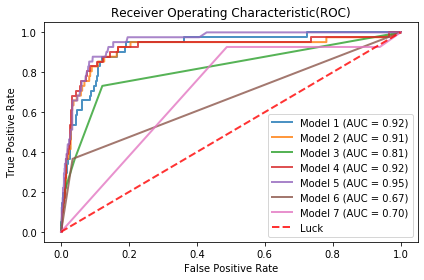

In [149]:
# Compute ROC curve and area the curve
pointer = [0,1102,2204,3306,4408,5510,6612,7714] 
for a in range(0,7):
       index_1 = pointer[a]
       index_2 = pointer[a+1]
       fpr, tpr, thresholds = roc_curve(y_test, probas[index_1:index_2, 1])
       tprs.append(interp(mean_fpr, fpr, tpr))
       tprs[-1][0] = 0.0
       roc_auc = auc(fpr, tpr)
       aucs.append(roc_auc)
       plt.plot(fpr, tpr, lw=2, alpha=0.8,
                label='Model %d (AUC = %0.2f)' % (a+1, roc_auc))
       
       a += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Luck', alpha=.8)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)


plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic(ROC)')
plt.legend(loc="lower right")
plt.tight_layout()

plt.show()